In [2]:
import subprocess
import time
import matplotlib.pyplot as plt
import numpy as np


  

In [13]:

g_values = range(1, 11)
h_values = range(1, 11)
g_h_values = []

for g in g_values:
    for h in h_values:
        if g>((h)/2):
            continue
        g_h_values.append((str(g), str(h))) 
            
start_time = time.time()
i=1
test_values = []
for g, h in g_h_values:
    print("Test", i, "of", len(g_h_values))
    print("Elapsed time:", time.time() - start_time)
    print("g:", g, "h:", h)
    i+=1 
    outputs = subprocess.run(["./ff", "-E", "-g", g, "-h", h, "-o", "domain-1.pddl", "-f", "problem-hard.pddl"], stdout=subprocess.PIPE, text=True).stdout.split("\n")
    reference_line = [line for line in outputs if line.startswith("time spent")]
    if reference_line:
        ref = outputs.index(reference_line[0])
        total_time= outputs[ref+6][14:19]
        steps_taken= outputs[ref-3][6:9]
        print(f"{steps_taken} step path found in {total_time} seconds \n")
        test_values.append([g,h,steps_taken,total_time])
    else:
        test_values = [g,h,0,0]




Test 1 of 25
Elapsed time: 0.0005562305450439453
g: 1 h: 2
 59 step path found in  1.45 seconds 

Test 2 of 25
Elapsed time: 1.4720568656921387
g: 1 h: 3
 59 step path found in  0.43 seconds 

Test 3 of 25
Elapsed time: 1.9080874919891357
g: 1 h: 4
 73 step path found in  0.38 seconds 

Test 4 of 25
Elapsed time: 2.3000032901763916
g: 1 h: 5
 83 step path found in  0.57 seconds 

Test 5 of 25
Elapsed time: 2.879260301589966
g: 1 h: 6
 83 step path found in  0.88 seconds 

Test 6 of 25
Elapsed time: 3.7807366847991943
g: 1 h: 7
 81 step path found in  0.53 seconds 

Test 7 of 25
Elapsed time: 4.321553707122803
g: 1 h: 8
 97 step path found in  0.57 seconds 

Test 8 of 25
Elapsed time: 4.909640789031982
g: 1 h: 9
 97 step path found in  0.36 seconds 

Test 9 of 25
Elapsed time: 5.280977010726929
g: 1 h: 10
113 step path found in  0.15 seconds 

Test 10 of 25
Elapsed time: 5.443159341812134
g: 2 h: 4
 59 step path found in  1.65 seconds 

Test 11 of 25
Elapsed time: 7.107518196105957
g: 2

In [15]:
ghratio = [((float(x[0]))/(float(x[1]))) for x in test_values]
steps = [float(x[2]) for x in test_values]
times = [float(x[3]) for x in test_values]

/tmp/ipykernel_145526/341302776.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_145526/341302776.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


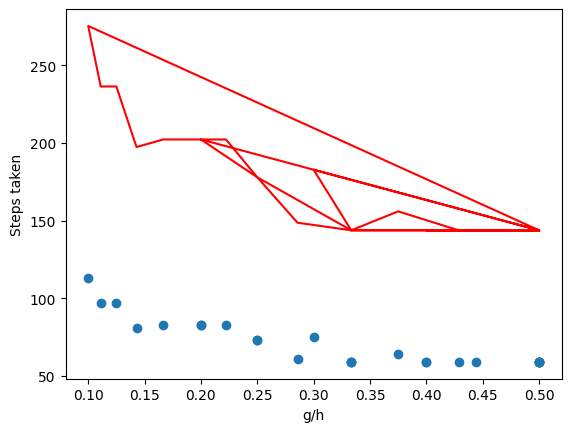

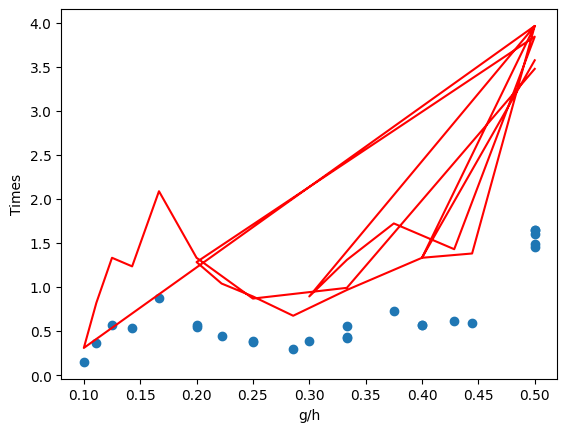

In [18]:
# plot the graph for steps_taken vs. g and h
fig, ax = plt.subplots()
ax.scatter(ghratio, steps)
ax.set_xlabel('g/h')
ax.set_ylabel('Steps taken')

# add regression line
y = [m*step + b for step in steps]
ax.plot(ghratio, y, color='red')
fig.show()

# plot the graph for total_time vs. g and h
fig, ax = plt.subplots()
ax.scatter(ghratio,times)
ax.set_xlabel('g/h')
ax.set_ylabel('Times')

 # add regression line
y = [m*time + b for time in times]
ax.plot(ghratio, y, color='red')
fig.show()
